In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [2]:
df=pd.read_csv("Fraud.csv")

In [3]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
df.shape

(6362620, 11)

checking for null values

In [6]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


there are no null values Therefore data cleaning is not needed

In [7]:
df.iloc[0]

step                        1
type                  PAYMENT
amount                9839.64
nameOrig          C1231006815
oldbalanceOrg        170136.0
newbalanceOrig      160296.36
nameDest          M1979787155
oldbalanceDest            0.0
newbalanceDest            0.0
isFraud                     0
isFlaggedFraud              0
Name: 0, dtype: object

In [8]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [3]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


# normalizing skewed data

In [9]:
df.skew()

C:\Users\vinay\AppData\Local\Temp/ipykernel_14068/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


step                0.375177
amount             30.993949
oldbalanceOrg       5.249136
newbalanceOrig      5.176884
oldbalanceDest     19.921758
newbalanceDest     19.352302
isFraud            27.779538
isFlaggedFraud    630.603629
dtype: float64

Data is positively skewed and trasnformation will be needed to be applied to get normal distribution

In [10]:
from scipy.special import boxcox1p

skew_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

df_logs = df[skew_cols].copy()
df_boxcox = df[skew_cols].copy()

for i in skew_cols: 
    df_logs.loc[:, i] = np.log(df_logs.loc[:, i] + 1)
    df_boxcox.loc[:, i] = boxcox1p(df_boxcox.loc[:, i], 0.1)

In [11]:
df_logs.skew()

amount           -0.555018
oldbalanceOrg    -0.259723
newbalanceOrig    0.440148
oldbalanceDest   -0.213261
newbalanceDest   -0.386937
dtype: float64

In [12]:
df_boxcox.skew() 

amount           -0.076000
oldbalanceOrg     0.342407
newbalanceOrig    0.741744
oldbalanceDest   -0.040291
newbalanceDest   -0.201477
dtype: float64

In [13]:
df = pd.concat([df[['step','type','nameOrig', 'nameDest','isFraud', 'isFlaggedFraud']],df_logs[['oldbalanceOrg','newbalanceOrig']], df_boxcox[['amount','oldbalanceDest','newbalanceDest']]], axis=1, join='inner') 
print(df.shape)
df.head()

(6362620, 11)


,step,type,nameOrig,nameDest,isFraud,isFlaggedFraud,oldbalanceOrg,newbalanceOrig,amount,oldbalanceDest,newbalanceDest
0,1,PAYMENT,C1231006815,M1979787155,0,0,12.044359,11.984786,15.078545,0.000000,0.0
1,1,PAYMENT,C1666544295,M2044282225,0,0,9.964112,9.872292,11.236082,0.000000,0.0
2,1,TRANSFER,C1305486145,C553264065,1,0,5.204007,0.000000,6.827017,0.000000,0.0
3,1,CASH_OUT,C840083671,C38997010,1,0,5.204007,0.000000,6.827017,17.076888,0.0
4,1,PAYMENT,C2048537720,M1230701703,0,0,10.634773,10.305174,15.509614,0.000000,0.0


In [14]:
df[df.isFraud == 1].tail(30)

,step,type,nameOrig,nameDest,isFraud,isFlaggedFraud,oldbalanceOrg,newbalanceOrig,amount,oldbalanceDest,newbalanceDest
6362590,741,TRANSFER,C509686434,C1310143791,1,0,12.687658,0.0,25.564604,0.000000,0.000000
6362591,741,CASH_OUT,C919525792,C993635374,1,0,12.687658,0.0,25.564604,27.579817,29.329456
6362592,741,TRANSFER,C457476945,C1688658215,1,0,12.857517,0.0,26.173863,0.000000,0.000000
6362593,741,CASH_OUT,C369315575,C2069429837,1,0,12.857517,0.0,26.173863,32.192913,33.021097
6362594,741,TRANSFER,C31496887,C1251365829,1,0,11.884119,0.0,22.818651,0.000000,0.000000
6362595,741,CASH_OUT,C1092829426,C716019997,1,0,11.884119,0.0,22.818651,0.000000,22.818651
6362596,741,TRANSFER,C1112979339,C2114078084,1,0,10.788161,0.0,19.411955,0.000000,0.000000
6362597,741,CASH_OUT,C1706094385,C2109905271,1,0,10.788161,0.0,19.411955,27.245598,27.582729
6362598,742,TRANSFER,C1044665079,C750074708,1,0,15.204067,0.0,35.740852,0.000000,0.000000
6362599,742,CASH_OUT,C1970706589,C637394241,1,0,15.204067,0.0,35.740852,30.642662,36.981119


C to C has more fraud Transactions

In [15]:
import re  
df['nameOrig'] = df['nameOrig'].apply(lambda x: re.sub('C[A-Za-z0-9]*', 'C',x)) 
df['nameDest'] = df['nameDest'].apply(lambda x: re.sub('C[A-Za-z0-9]*','C',x))   
df['nameDest'] = df['nameDest'].apply(lambda x: re.sub('M[A-Za-z0-9]*','M',x)) 
df.head()

,step,type,nameOrig,nameDest,isFraud,isFlaggedFraud,oldbalanceOrg,newbalanceOrig,amount,oldbalanceDest,newbalanceDest
0,1,PAYMENT,C,M,0,0,12.044359,11.984786,15.078545,0.000000,0.0
1,1,PAYMENT,C,M,0,0,9.964112,9.872292,11.236082,0.000000,0.0
2,1,TRANSFER,C,C,1,0,5.204007,0.000000,6.827017,0.000000,0.0
3,1,CASH_OUT,C,C,1,0,5.204007,0.000000,6.827017,17.076888,0.0
4,1,PAYMENT,C,M,0,0,10.634773,10.305174,15.509614,0.000000,0.0


In [16]:
df[df.isFraud == 1].type.value_counts()


CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [17]:
df= pd.get_dummies(df, columns=['type','nameOrig', 'nameDest'])

In [18]:
df.head(20)

,step,isFraud,isFlaggedFraud,oldbalanceOrg,newbalanceOrig,amount,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameOrig_C,nameDest_C,nameDest_M
0,1,0,0,12.044359,11.984786,15.078545,0.000000,0.000000,0,0,0,1,0,1,0,1
1,1,0,0,9.964112,9.872292,11.236082,0.000000,0.000000,0,0,0,1,0,1,0,1
2,1,1,0,5.204007,0.000000,6.827017,0.000000,0.000000,0,0,0,0,1,1,1,0
3,1,1,0,5.204007,0.000000,6.827017,17.076888,0.000000,0,1,0,0,0,1,1,0
4,1,0,0,10.634773,10.305174,15.509614,0.000000,0.000000,0,0,0,1,0,1,0,1
5,1,0,0,10.894162,10.737337,14.508318,0.000000,0.000000,0,0,0,1,0,1,0,1
6,1,0,0,12.118312,12.078740,14.276130,0.000000,0.000000,0,0,0,1,0,1,0,1
7,1,0,0,12.078740,12.033067,14.522054,0.000000,0.000000,0,0,0,1,0,1,0,1
8,1,0,0,7.890583,0.000000,12.934035,0.000000,0.000000,0,0,0,1,0,1,0,1
9,1,0,0,10.638760,10.501863,13.590879,18.988141,18.879131,0,0,1,0,0,1,1,0


In [19]:
print(len(df.columns))
df.columns

16


Index(['step', 'isFraud', 'isFlaggedFraud', 'oldbalanceOrg', 'newbalanceOrig',
       'amount', 'oldbalanceDest', 'newbalanceDest', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER',
       'nameOrig_C', 'nameDest_C', 'nameDest_M'],
      dtype='object')

# Making the model

In [20]:
features = ['step', 'isFlaggedFraud', 'oldbalanceOrg', 'newbalanceOrig',
       'amount', 'oldbalanceDest', 'newbalanceDest', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER',
       'nameOrig_C', 'nameDest_C', 'nameDest_M']  
target=['isFraud'] 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(df[features],df['isFraud'], test_size=0.2, random_state=42)

In [21]:
len(x_train), len(x_test)

(5090096, 1272524)

In [22]:
y_test.value_counts() 

0    1270904
1       1620
Name: isFraud, dtype: int64

There are imbalanced classes in training and test sets

Imbalanced training set will make our model have lower accuracy, sampling is needed

In [23]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE 
from imblearn.pipeline import Pipeline
from collections import Counter 
over = SMOTE(sampling_strategy=0.025) 
under=RandomUnderSampler(random_state=42, sampling_strategy=0.5)
steps = [('o', over),('u', under)] 
pipeline = Pipeline(steps=steps) 
x_res, y_res = pipeline.fit_resample(x_train[features], y_train) 
print(Counter(y_res))

Counter({0: 254174, 1: 127087})


# Random Forest Classifier Model

In [24]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(criterion = 'gini',
                              max_depth = 48,
                              max_features = 'sqrt',
                              n_estimators = 300)
                             

clf.fit(x_res, y_res)

RandomForestClassifier(max_depth=48, n_estimators=300)

In [27]:
import joblib
f_name = 'C:/Users/vinay/Desktop/Fraud Detection/rfc_model.sav'
joblib.dump(clf, f_name)

['C:/Users/vinay/Desktop/Fraud Detection/rfc_model.sav']

In [28]:
score = clf.score(x_test,y_test)
y_preds = clf.predict(x_test)
score, y_preds

(0.9961973212293049, array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

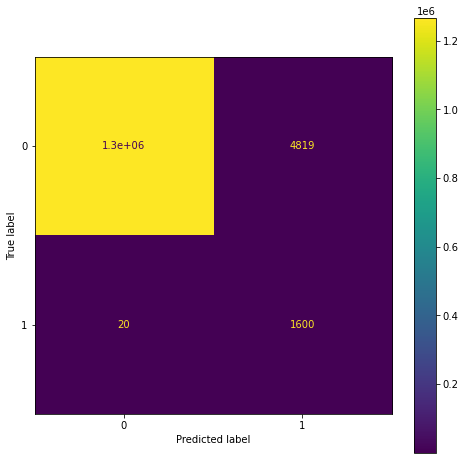

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (8,8))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                        y_pred = y_preds, ax=ax);

22 fraud cases have been misjudged and predicted as non fraud

In [33]:
from sklearn.metrics import classification_report                              

c_r = (classification_report(y_test, y_preds, digits=4))
print(c_r)

              precision    recall  f1-score   support

           0     1.0000    0.9962    0.9981   1270904
           1     0.2493    0.9877    0.3981      1620

    accuracy                         0.9962   1272524
   macro avg     0.6246    0.9919    0.6981   1272524
weighted avg     0.9990    0.9962    0.9973   1272524



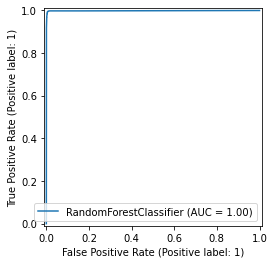

In [39]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf, x_test, y_test)

# logistic Regression Model

In [43]:
from sklearn.linear_model import LogisticRegression

clf_lg = LogisticRegression(C=0.20433597178569418, 
                         solver = "liblinear")
clf_lg.fit(x_train, y_train); 
score_lg = clf_lg.score(x_test, y_test)
y_preds_lg = clf_lg.predict(x_test)
score_lg, y_preds_lg 

(0.9993202485768441, array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [46]:
import pickle
file_n ='C:/Users/vinay/Desktop/Fraud Detection/lg_model.sav' 
pickle.dump(clf_lg, open(file_n, 'wb'))

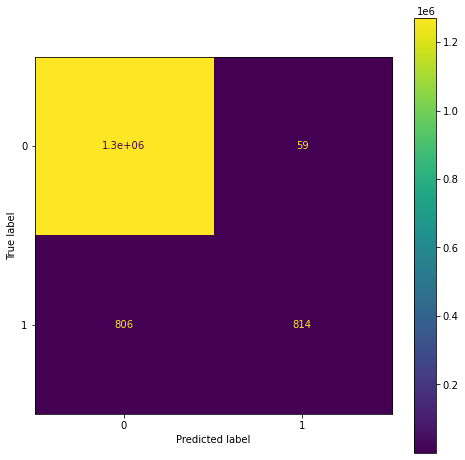

In [49]:
fig, ax = plt.subplots(figsize = (8,8))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                        y_pred = y_preds_lg, ax=ax);

Random forest is more reliable as it had less false negatives than logistic regression

In [45]:
c_r = (classification_report(y_test, y_preds_lg, digits=4))
print(c_r)

              precision    recall  f1-score   support

           0     0.9994    1.0000    0.9997   1270904
           1     0.9324    0.5025    0.6530      1620

    accuracy                         0.9993   1272524
   macro avg     0.9659    0.7512    0.8263   1272524
weighted avg     0.9993    0.9993    0.9992   1272524



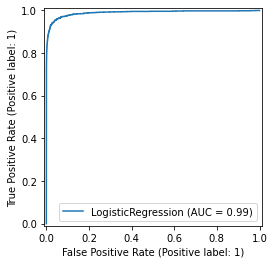

In [48]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf_lg, x_test, y_test)

# Project Report (Candidate Expectations)


## 1. Data cleaning including missing values, outliers, and multi-collinearity.

In the data cleaning process, I found that there were no missing values, which minimized the need for extensive cleaning. Outliers were retained instead of removed, as tree-based algorithms like RandomForest are robust against outliers and removing them could lead to a loss of important information. When checking for multi-collinearity, I found that most data points were not correlated. However, there were correlations between oldbalanceOrig and newbalanceOrig, and between oldbalanceDest and newbalanceDest. These correlations are logical, given that they represent the addition and subtraction of amounts in transactions. Since these correlations are expected and do not suggest redundancy, no columns were removed.
## 2. Describe your fraud detection model in elaboration.
The fraud detection model follows these steps:<br>

1.	The process begins by importing the dataset and conducting an initial exploratory analysis to understand the data.<br>
2.	Correlations between data points are checked, especially focusing on removing any correlations between unrelated features.<br>
3.	Skewed columns undergo transformations to normalize their distribution, improving model accuracy.<br>
4.	: One-hot encoding is applied to categorical variables, such as nameOrig and nameDest, which are then preserved as additional features in the model.<br>
5.	The data is split into training and testing sets using an 80-20 ratio to ensure robust model training and evaluation.<br>
6.	Sampling techniques are applied to address class imbalance, a common issue in fraud detection datasets.<br>
7.	The model is trained using both RandomForestClassifier and Logistic Regression, allowing for comparison and selection of the best-performing algorithm.


## 3. How did you select variables to be included in the model?
Variables were selected based on their relevance and contribution to the predictive power of the model. The selection process involved:<br>

•	Only features directly related to fraud detection were included.<br>
•	Variables that did not exhibit significant correlation with each other were preferred to avoid multicollinearity.<br>
•	Skewed variables were transformed to normalize their distribution.<br>
•	New features were created when necessary to enhance the model's effectiveness.<br>
•	Data normalization was applied to improve the model's performance and accuracy.<br>



## 4. Demonstrate the performance of the model by using the best set of tools.
The model's performance was evaluated using several metrics:<br>

•	While accuracy was measured, it was not solely relied upon due to the class imbalance common in fraud detection problems.<br>
•	The classification report provided a detailed view of precision, recall, and F1-score. RandomForestClassifier demonstrated higher recall but lower precision compared to Logistic Regression. Since recall is crucial in fraud detection, RandomForest was identified as the best-performing model.<br>
•	The confusion matrix was used to understand the model's prediction accuracy, particularly the number of true positives and false negatives. RandomForestClassifier outperformed Logistic Regression by producing significantly fewer false negatives.<br>
•	The ROC curve was plotted to visualize the trade-off between true positive and false positive rates, further validating the RandomForest model's effectiveness.<br>
## 5. What are the key factors that predict fraudulent customers?
The key features identified as significant predictors of fraudulent activity were:<br>

•	'isFlaggedFraud'<br>
•	'oldbalanceOrg'<br>
•	'type_CASH_OUT'<br>
•	'type_TRANSFER'<br>
## 6. Do these factors make sense? If yes, how? If not, how not?
Yes, these factors make sense:<br>

•	'isFlaggedFraud': This feature is critical as it flags transactions based on predefined conditions in the fraud detection software, such as transaction amount limits. It serves as an essential precautionary measure.<br>
•	'oldbalanceOrg': Customers with higher balances in their accounts are more susceptible to fraud, as fraudsters often target accounts with substantial funds.<br>
•	'type_CASH_OUT': Cash-out transactions, where non-cash assets are converted to cash, are more prone to fraud, particularly in online scenarios involving high-value goods.<br>
•	'type_TRANSFER': Fraud often occurs during transfers, especially when they are uninformed or poorly informed, making this feature a critical indicator of potential fraud.<br>




## 7. What kind of prevention should be adopted while the company updates its infrastructure?
To enhance fraud prevention, the company should consider the following measures:<br>

•	Implement multiple accounts or distribute funds for customers with large balances to reduce risk.<br>
•	Use separate accounts for online transactions to mitigate the likelihood of fraud.<br>
•	Introduce special protocols and security measures for cash-out transactions.<br>
•	Require additional verification steps for users frequently using transfer modes.<br>
## 8. Assuming these actions have been implemented, how would you determine if they work?
To determine the effectiveness of these measures, the company should collect and analyze data post-implementation. By comparing the rate of fraudulent activities before and after the changes, the company can assess whether the measures have successfully reduced the incidence of fraud. Continuous monitoring and periodic evaluation will also be crucial in ensuring the long-term success of these preventative strategies.

